### Run the saved model.
This code will eventually be used to run the model on new inputs given from a web app.

In [ ]:
from tensorflow.keras.models import load_model
from matplotlib import pyplot as plt
import tensorflow as tf
from PIL import Image
import numpy as np
import cv2
import os

In [2]:
# set the path to your dataset
test_dir = './image_scrape_code/test_images'

# append dir and folder name into a list 
test_image_files = [
    os.path.join(test_dir, filename)
    for filename in os.listdir(test_dir)
    if filename.endswith(".png")
]
print(len(test_image_files))

4


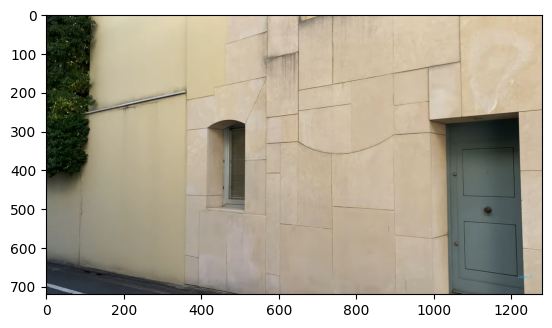

In [3]:
image = test_image_files[3]
img = cv2.imread(image)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

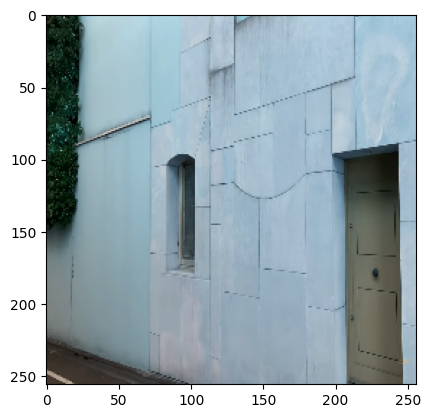

In [4]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [6]:
model = load_model('models/person_in_img_classifier.h5')


In [7]:
#the no.expand puts into another array. Our model expects a batch not a sinlge image
prediction = model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 130ms/step


In [8]:
if prediction > 0.5:
    print(f'{image} has a person in it')
else:
     print(f'{image} has no person in it')

./image_scrape_code/test_images/test-screenshot-2024-01-29T00-46-02.043Z.png has no person in it
